<a href="https://colab.research.google.com/github/SrilaxmiThatha/Data-science-and-Business-analytics-internship--TSF-GRIP-Tasks/blob/main/TASK_2_PREDICTION_USING_UNSUPERVISED_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The** **Sparks** **Foundation** **Internship**
**Data** **Science** & **Business** **Analytics** **Tasks** 

**Task**-**II** :- Prediction using Unsupervised ML

**Concept** :- Clustering with k means

**Description** :- From the given ‘Iris’ dataset, predict the optimum number of clusters

**Dataset** : https://bit.ly/3kXTdox

**Author** :- THATHA SRIALXMI

**Language** :- Python 

To start, let's import required libraries for the given task.

In [ ]:
 #Importing Important libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

**Importing** **the** **Data** **of** **iris** **with** **different** **characteristics**

In [ ]:
#Loading the iris data
iris = datasets.load_iris()
dataset = pd.read_csv("https://bit.ly/3kXTdox")
iris_data.head()    #See first five rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Columns: 722 entries, <!DOCTYPE html><html><head><meta name="google" content="notranslate"><meta http-equiv="X-UA-Compatible" content="IE=edge;"><style nonce="dFqPRWAmyrX3jJ7ceyzdsw">@font-face{font-family:'Roboto';font-style:italic;font-weight:400;src:url(//fonts.gstatic.com/s/roboto/v18/KFOkCnqEu92Fr1Mu51xIIzc.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:300;src:url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmSU5fBBc9.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:400;src:url(//fonts.gstatic.com/s/roboto/v18/KFOmCnqEu92Fr1Mu4mxP.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:700;src:url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmWUlfBBc9.ttf)format('truetype');}</style><meta name="referrer" content="origin"><title>Iris.csv - Google Drive</title><meta property="og:title" content="Iris.c

**The** **optimum** **number** **of** **clusters** **for** **K** **Means**

In [ ]:
#Optimum Number of Clusters for k-means Classification

x = iris_data.iloc[:,[0,1,2,3]].values     # spliting data into for columns \

from sklearn.cluster import KMeans
wcss = []     #Within Clusters Sum of Squares

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

***WCSS*** **knowledge**

WCSS shows variation of the data from centered value.

WCSS is less when the data is of simliar kind. Else it has mixed kind of data for which clusters are used for different kinds.

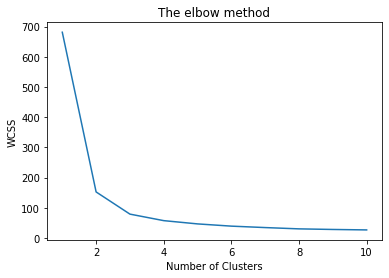

In [ ]:
#PLotting of the results
#observation of "The elbow"
plt.plot(range(1,11),wcss)
plt.title("The elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


**Elbow** **Method**

'The elbow method' from the above graph, the optimum clusters is where the elbow occurs.

This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

Hence, the optimum number of clusters is 3

It means there are 3 types of data that make 3 clusters having different wcss

In [ ]:
#Creating k-means classifier for given data
kmeans = KMeans(n_clusters=3, init="k-means++",
               max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)

**Visualization**


Let's visualize the 3 different clusters with their means.

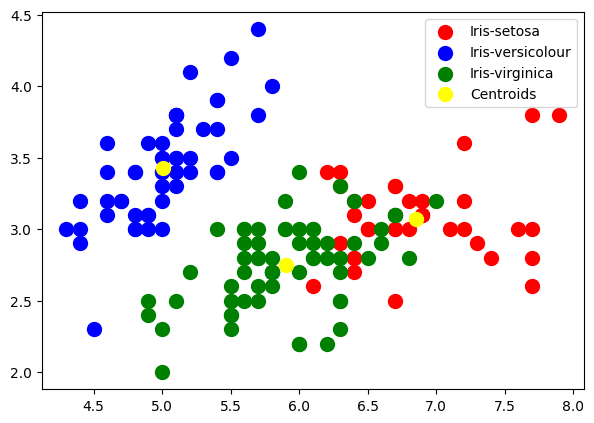

In [ ]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(7,5),dpi=100)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()